# 实验2 多项式回归模型应用实验

### 任务1：糖尿病患病线性回归实验
1）在scikit-learn工具包中基于其中的糖尿病数据集diabetes，调用scikit-learn中LinearRegression算法函数进行自主实验（一年后糖尿病数值与患者BMI指数的线性回归）。<br>
2）调用scikit-learn中的MSE/R2指标工具计算上一步实验的相应指标值。<br>
3）调用matplotlib画出测试集数据散点图和预测直线图。<br>
4）写出实验过程，分析实验结果，提交实验报告。

1.导入模块

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

2.获取数据集

In [2]:
# 获取糖尿病数据集
diabetes = datasets.load_diabetes()  
X, y = diabetes.data, diabetes.target
# 将特征矩阵和目标变量整合成DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=diabetes.feature_names + ["target"])
# 输出前几行
print("前几行数据集:")
print(df.head())

前几行数据集:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


3.选择BMI指数作为特征向量（x值），糖尿病数值作为y值

In [19]:
x=X[:,2]
y=diabetes.target
print(len(x))
print(len(y))

442
442


4.划分训练集和测试集（随机分割或手动分割）

In [8]:
# 划分数据集为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.建立一元线性回归模型拟合糖尿病数值与BMI指数的关系

In [11]:
#拟合一元线性回归模型
reg = linear_model.LinearRegression()  #实例化
temps=x.reshape(-1,1) # fit（）时需要二维数据，故需要转换形状
#print(temps)
reg.fit (temps, y)

6.测试集数据预测糖尿病数值

In [12]:
temps_pred = reg.predict(temps)
print(temps_pred) #训练数据预测

[ 210.71003806  103.26219543  194.33703347  141.12476855  117.58857445
  113.4953233   107.35544658  150.33458363  210.71003806  189.22046954
   72.56281182  168.7542138   124.75176395  150.33458363  127.82170232
  134.98489182  192.2904079   163.63764986  142.14808133  134.98489182
   98.14563149  130.89164068  148.28795806  209.68672528  186.15053118
  140.10145576   78.70268854  208.66341249  131.91495346  146.24133248
  194.33703347   89.9591292   271.0854925   104.28550821   92.00575477
  122.70513838  173.87077773  162.61433707  219.91985315  165.68427544
  144.19470691   87.91250362  142.14808133  129.86832789  216.84991479
  118.61188723  141.12476855   82.79593969  112.47201051  165.68427544
  145.2180197   167.73090101  143.17139412  137.0315174   175.91740331
  105.308821    191.26709511   92.00575477   90.98244198  127.82170232
  148.28795806  156.47446035  145.2180197   116.56526166  127.82170232
  128.8450151   134.98489182  138.05483019  123.72845117  108.37875936
   85.

7.评估一元线性回归模型（MSE和R2）

In [13]:
print('MSE: %.2f' % mean_squared_error(y, temps_pred))  #均方误差
print("W(0):", reg.intercept_, "   W(1):", reg.coef_)  #系数

MSE: 3890.46
W(0): 152.133484163    W(1): [ 949.43526038]


8.画出测试数据集散点图及拟合直线图

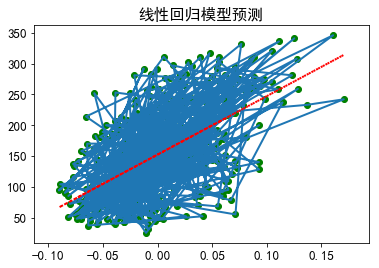

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
plt.title(u'线性回归模型预测')
plt.scatter(x, y, color="green", label="数量",linewidth=2)
plt.plot(x, y, linewidth=2)
plt.plot(x, temps_pred, color="red", linewidth=2,linestyle=":")
plt.show()

### 任务2：梯度下降法求解方程
### 仿照代码4.4，在TensorFlow2框架下利用它们提供的自动求导方法来实现对方程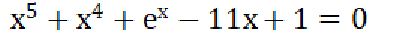的梯度下降法求解。<br>
1.定义损失函数<br>
2.定义梯度函数<br>
3.更新参数求解<br>
（1）设置初始参数值<br>
（2）设置学习率（步长）值<br>
（3）设置迭代次数或迭代条件<br>

In [ ]:
import tensorflow as tf    
# 定义损失函数  
def loss_function(x, e):  
    # 方程左侧  
    equation_left_side = x**5 + x**3 + e*x - 11*x + 1  
    # 损失：方程左侧的平方  
    loss = tf.square(equation_left_side)  
    return loss    
# 初始化变量  
x = tf.Variable(initial_value=1.0, trainable=True)  # 初始值可以根据实际情况选择  
e = tf.constant(value=1.0)  # 假设e是一个已知的常数，这里设为1.0作为示例    
# 定义优化器和学习率  
optimizer = tf.optimizers.SGD(learning_rate=0.01)    
# 梯度下降迭代求解  
num_iterations = 1000  # 迭代次数  
for _ in range(num_iterations):  
    with tf.GradientTape() as tape:  
        loss_value = loss_function(x, e)  
    # 计算损失关于x的梯度  
    grad = tape.gradient(loss_value, x)  
    # 应用梯度下降更新x的值  
    optimizer.apply_gradients([(grad, x)])  
  
    # 打印当前x的值和损失值  
    if _ % 100 == 0:  
        print(f"Iteration {_}, x = {x.numpy()}, loss = {loss_value.numpy()}")    
# 输出最终的x值  
print(f"Final x value: {x.numpy()}")

### 任务3：多项式回归实验
#### 1）通过调用scikit-learn工具包中相关函数，实现对指定样本集的多项式回归拟合。
#### 2）分别用三次多项式回归模型、五次多项式回归模型、九次多项式回归模型来拟合指定的样本集，分别画出拟合的曲线，分别计算出样本集的MSE，并观察它们的多项式系数。
#### 3）写出实验过程，记录拟合的曲线和MSE、系数等数据值，给出初步的分析，提交实验报告。

#### 训练样本由平面上的点组成，x是实例，y是标签。

In [27]:
import numpy as np
x_train0 = np.linspace(0, 6, 7)

In [28]:
y_train0 = np.array([0.01625328, 1.34756601, 2.689906  , 1.90670405, 1.68225754,
       1.50995894, 2.40339366])

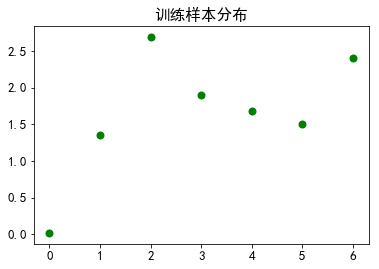

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=13)
plt.title(u'训练样本分布')
plt.scatter(x_train0, y_train0, color="green", linewidth=2)
plt.show()

拟合线性回归模型

--线性回归模型--
训练集均方误差MSE： 0.428164991153
系数：[[ 0.23137709]]
截距：[ 0.95673151]


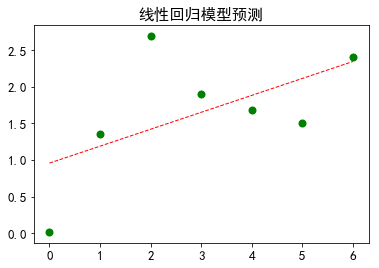

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
x_train = x_train0.reshape(-1,1)
y_train = y_train0.reshape(-1,1)
# 创建并拟合模型
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
print('--线性回归模型--')
print('训练集均方误差MSE：',mean_squared_error(y_train, y_pred_train))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

plt.title(u'线性回归模型预测')
plt.scatter(x_train0, y_train0, color="green", linewidth=2)
x1 = np.linspace(0, 6, 100)
x1 = x1.reshape(-1,1)
y1 = model.predict(x1)
plt.plot(x1, y1, "r--", linewidth=1)
plt.show()

### 拟合三次多项式模型
#### 1.将自变量x_train进行特征变换，将其转换为三项式特征，使用PolynomialFeatures类来创建三项式特征
#### 2.拟合三次多项式回归模型,输出模型参数和MSE，使用LinearRegression类来拟合三项式回归模型
#### 3.可视化三次多项式回归的结果，使用matplotlib库来可视化

--线性回归模型--
训练集均方误差MSE： 0.0522897557355
系数：[[ 2.64465775 -0.9110165   0.08978878]]
截距：[-0.09658877]


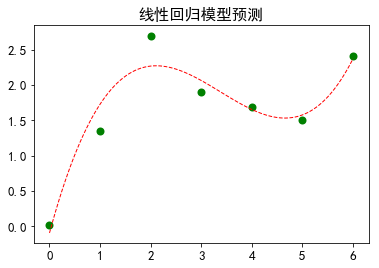

In [63]:
from sklearn.preprocessing import PolynomialFeatures
# 创建多项式特征，设置次数为3  
poly_features = PolynomialFeatures(degree=3, include_bias=False)  
# 将原始特征转换为多项式特征
x_train = x_train0.reshape(-1,1)
y_train = y_train0.reshape(-1,1)
x_poly = poly_features.fit_transform(x_train)   

# 创建并拟合模型
model = LinearRegression()
model.fit(x_poly, y_train)
y_pred_train = model.predict(x_poly)
print('--线性回归模型--')
print('训练集均方误差MSE：',mean_squared_error(y_train, y_pred_train))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

plt.title(u'线性回归模型预测')
plt.scatter(x_train, y_train, color="green", linewidth=2)
x1 = np.linspace(x_train.min(), x_train.max(), 100)
x1 = x1.reshape(-1,1)
x1_poly = poly_features.transform(x1)
y1 = model.predict(x1_poly)
plt.plot(x1, y1, "r--", linewidth=1)
plt.show()

### 拟合五次多项式模型

--线性回归模型--
训练集均方误差MSE： 0.0250265003467
系数：[[ 0.47591328  1.87462054 -1.1269987   0.21791579 -0.01375281]]
截距：[ 0.00248394]


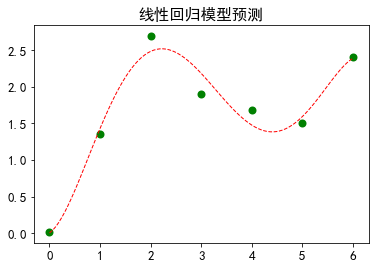

In [64]:
# 创建多项式特征，设置次数为5  
poly_features = PolynomialFeatures(degree=5, include_bias=False)  
# 将原始特征转换为多项式特征
x_train = x_train0.reshape(-1,1)
y_train = y_train0.reshape(-1,1)
x_poly = poly_features.fit_transform(x_train)   

# 创建并拟合模型
model = LinearRegression()
model.fit(x_poly, y_train)
y_pred_train = model.predict(x_poly)
print('--线性回归模型--')
print('训练集均方误差MSE：',mean_squared_error(y_train, y_pred_train))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

plt.title(u'线性回归模型预测')
plt.scatter(x_train, y_train, color="green", linewidth=2)
x1 = np.linspace(x_train.min(), x_train.max(), 100)
x1 = x1.reshape(-1,1)
x1_poly = poly_features.transform(x1)
y1 = model.predict(x1_poly)
plt.plot(x1, y1, "r--", linewidth=1)
plt.show()

### 九次多项式模型

--线性回归模型--
训练集均方误差MSE： 3.96478644454e-20
系数：[[  7.30447773e-01   5.14021343e-01   2.30432218e-01  -4.22337995e-02
   -1.36405485e-01   2.81674485e-02   9.96411845e-03  -3.33289124e-03
    2.52005210e-04]]
截距：[ 0.01625328]


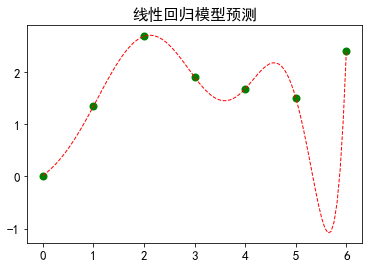

In [65]:
# 创建多项式特征，设置次数为9  
poly_features = PolynomialFeatures(degree=9, include_bias=False)  
# 将原始特征转换为多项式特征
x_train = x_train0.reshape(-1,1)
y_train = y_train0.reshape(-1,1)
x_poly = poly_features.fit_transform(x_train)   

# 创建并拟合模型
model = LinearRegression()
model.fit(x_poly, y_train)
y_pred_train = model.predict(x_poly)
print('--线性回归模型--')
print('训练集均方误差MSE：',mean_squared_error(y_train, y_pred_train))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

plt.title(u'线性回归模型预测')
plt.scatter(x_train, y_train, color="green", linewidth=2)
x1 = np.linspace(x_train.min(), x_train.max(), 100)
x1 = x1.reshape(-1,1)
x1_poly = poly_features.transform(x1)
y1 = model.predict(x1_poly)
plt.plot(x1, y1, "r--", linewidth=1)
plt.show()